# Tareas de regresión con SkLearn



In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_boston

boston_data = load_boston()
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
print(boston_data.DESCR)
##
# data = pd.DataFrame(open("housing.data"), columns=housing.names

target = pd.DataFrame(boston_data.target)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data.describe()

       CRIM     ZN  INDUS  CHAS    NOX     RM    AGE      DIS   RAD    TAX  \
0  -0.99368   -1.0  -0.54  -1.0 -0.615  2.561    1.9   0.1296   0.0  186.0   
1  89.97620  101.0  28.74   2.0  1.871  9.780  101.0  13.1265  25.0  712.0   

   PTRATIO       B  LSTAT  
0     11.6   -0.68   0.73  
1     23.0  397.90  38.97  


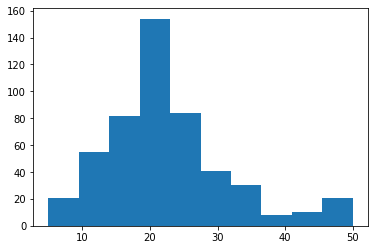

In [66]:
plt.hist(boston_data.target)#%%

range_features = pd.DataFrame({
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
})
print(range_features)

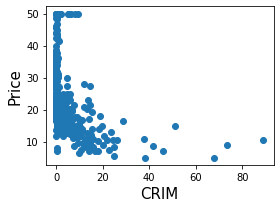

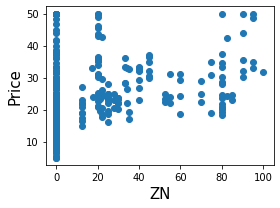

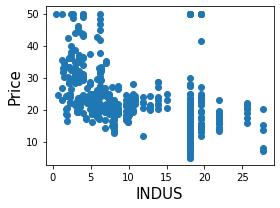

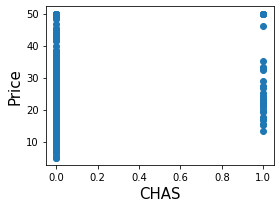

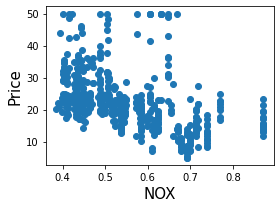

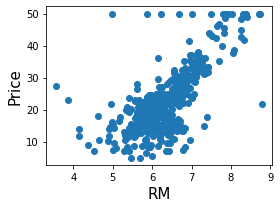

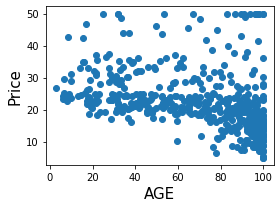

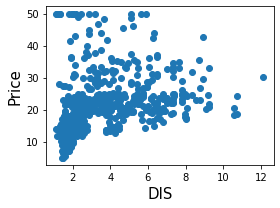

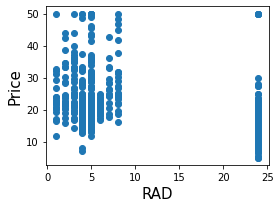

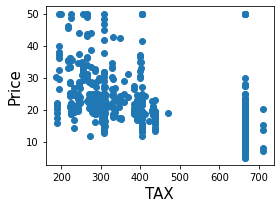

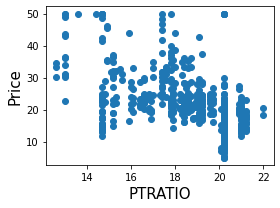

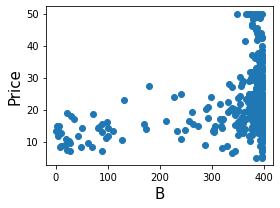

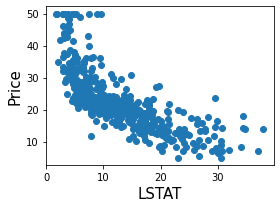

In [14]:
for index, feature_name in enumerate(boston_data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_data.data[:, index], boston_data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

Separamos datos de prueba y de entrenamiento

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["LSTAT", "PTRATIO", "AGE", "RM"]], boston_data.target)

Procedemos a crear el modelo

In [18]:
from sklearn.linear_model import LinearRegression, ElasticNet

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

Vamos a calcular el error

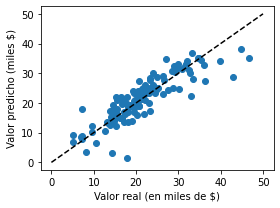

In [19]:
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4,3))
plt.scatter(expected,predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()

In [21]:
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))
print(f"La precision del modelo vs el set de prueba es {clf.score(X_test, y_test)}")

RMS: 4.127503148765804 
La precision del modelo vs el set de prueba es 0.7268955570526339


# Regresor basado en Arbol de decisión

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=7)
tree_regressor.fit(X_train, y_train)

tree_predicted = tree_regressor.predict(X_test)

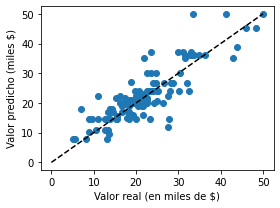

In [74]:
plt.figure(figsize=(4,3))
plt.scatter(expected,tree_predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()

In [75]:
print("RMS: %r " % np.sqrt(np.mean((tree_predicted - expected) ** 2)))
print(f"La precision del modelo de arbol vs el set de prueba es {tree_regressor.score(X_test, y_test)}")

RMS: 4.695628106400431 
La precision del modelo de arbol vs el set de prueba es 0.6886126780104183


<AxesSubplot:>

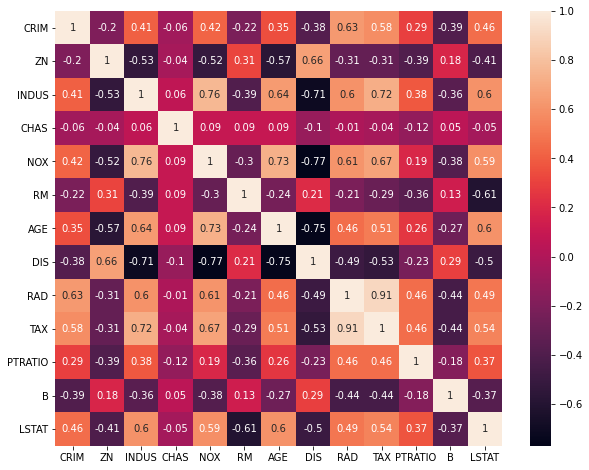

In [51]:
#building matrix that contains all correlations of all features
correlation_matrix = data.corr().round(2)

#definiton of figure size for our matrix
fig, ax = plt.subplots(figsize=(10,8))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot = True)

# Un regresor basado en estimación de Kernel


In [52]:
from sklearn.kernel_ridge import KernelRidge

kernel_reg = KernelRidge()
kernel_reg.fit(X_train, y_train)


KernelRidge()

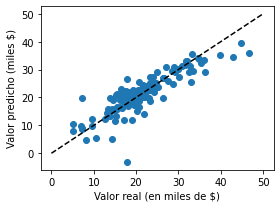

In [53]:
kernel_predicted = kernel_reg.predict(X_test)
expected = y_test

plt.figure(figsize=(4,3))
plt.scatter(expected,kernel_predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()

In [54]:
print("RMS: %r " % np.sqrt(np.mean((kernel_predicted - expected) ** 2)))
print(f"La precision del modelo de arbol vs el set de prueba es {kernel_reg.score(X_test, y_test)}")

RMS: 4.07697574329207 
La precision del modelo de arbol vs el set de prueba es 0.7335411224973002


Usando un regresor basado en red neuronal simple: Elastic Net

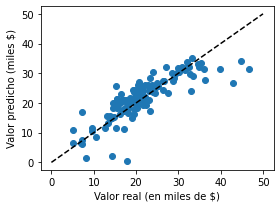

In [57]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
elasticN_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticN_model.fit(X_train, y_train)

elastic_predicted = elasticN_model.predict(X_test)
expected = y_test

plt.figure(figsize=(4,3))
plt.scatter(expected,elastic_predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()

In [58]:
print("RMS: %r " % np.sqrt(np.mean((elastic_predicted - expected) ** 2)))
print(f"La precision del modelo de arbol vs el set de prueba es {elasticN_model.score(X_test, y_test)}")



RMS: 4.443013890548543 
La precision del modelo de arbol vs el set de prueba es 0.6835469535203221


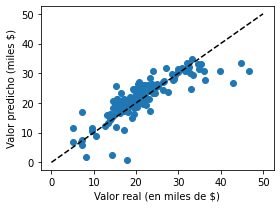

In [59]:
elasticN_model = ElasticNetCV()
elasticN_model.fit(X_train, y_train)

elastic_predicted = elasticN_model.predict(X_test)
expected = y_test

plt.figure(figsize=(4,3))
plt.scatter(expected,elastic_predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()

In [60]:
print("RMS: %r " % np.sqrt(np.mean((elastic_predicted - expected) ** 2)))
print(f"La precision del modelo de arbol vs el set de prueba es {elasticN_model.score(X_test, y_test)}")


RMS: 4.510647572738355 
La precision del modelo de arbol vs el set de prueba es 0.6738392245874194


## Usando un Regresor combinado (RandomForest)

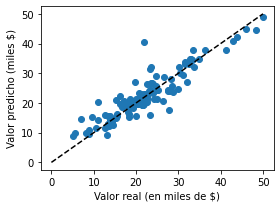

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

forest_predicted = forest_model.predict(X_test)
expected = y_test

plt.figure(figsize=(4,3))
plt.scatter(expected,forest_predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()

In [71]:
print("RMS: %r " % np.sqrt(np.mean((forest_predicted - expected) ** 2)))
print(f"La precision del modelo de arbol vs el set de prueba es {forest_model.score(X_test, y_test)}")


RMS: 3.4979544900088717 
La precision del modelo de arbol vs el set de prueba es 0.8272007516235169


# Regresor basado en un modelo MLP

/home/tian/miniconda3/envs/scientificProject/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RMS: 4.333711082907916 
La precision del modelo de arbol vs el set de prueba es 0.7347634020294604


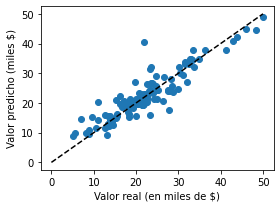

In [76]:
from sklearn.neural_network import MLPRegressor
nn_mlp_model = MLPRegressor(solver='lbfgs')
nn_mlp_model.fit(X_train, y_train)

nn_predicted = nn_mlp_model.predict(X_test)
expected = y_test

print("RMS: %r " % np.sqrt(np.mean((nn_predicted - expected) ** 2)))
print(f"La precision del modelo de arbol vs el set de prueba es {nn_mlp_model.score(X_test, y_test)}")

plt.figure(figsize=(4,3))
plt.scatter(expected,forest_predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()